In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('House-Price-Prediction-clean.csv')

In [5]:
df.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,64,796,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,317,1686,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,216,1107,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,952,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,140,991,...,0,4,0,0,0,0,0,1,2008,118000


In [6]:
df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [7]:
df.head(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
x = df.drop(['Id','SalePrice'],axis=1)
y = df['SalePrice']

In [12]:
x

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,877,1152,1188,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,0,1078,1078,...,240,366,0,112,0,0,0,0,4,2010


In [13]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
x_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
912,30,6120,5,7,1925,1950,489,279,768,1015,...,450,0,0,112,0,120,0,620,7,2006
373,20,10634,5,6,1953,1953,428,0,608,1319,...,270,66,0,0,0,0,0,0,11,2009
20,60,14215,8,5,2005,2006,0,1158,1158,1158,...,853,240,154,0,0,0,0,0,11,2006
800,60,12798,6,5,1997,1997,462,154,616,616,...,603,403,114,185,0,0,0,400,5,2008
152,60,14803,6,5,1971,1971,416,409,825,1097,...,495,0,66,0,0,0,0,0,6,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,190,10800,6,7,1905,2000,0,482,482,1221,...,672,0,25,212,0,0,0,0,4,2008
1344,60,11103,7,5,2006,2006,0,728,728,728,...,440,0,0,0,0,0,0,0,7,2007
527,60,14948,9,5,2008,2008,1330,122,1452,1476,...,858,126,66,0,0,0,0,0,11,2008
1149,70,9000,7,9,1920,1988,624,26,650,832,...,324,0,0,0,0,0,0,0,7,2009


In [16]:
x_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
854,20,17920,5,4,1955,1974,306,372,1763,1779,...,454,0,418,0,0,312,0,0,7,2006
381,20,7200,7,5,2006,2006,0,1293,1293,1301,...,572,216,121,0,0,0,0,0,8,2006
816,20,11425,5,6,1954,1954,486,522,1008,1008,...,275,0,0,120,0,0,0,0,7,2006
577,80,11777,5,6,1966,1966,328,285,1164,1320,...,564,160,68,240,0,0,0,0,5,2006
35,60,13418,8,5,2004,2005,0,1117,1117,1132,...,691,113,32,0,0,0,0,0,9,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,70,7200,7,6,1931,2000,0,776,776,851,...,270,0,0,112,0,0,0,0,2,2008
411,190,34650,5,5,1955,1955,1056,0,1056,1056,...,572,264,0,0,0,0,0,0,1,2006
861,190,11625,5,4,1965,1965,841,198,1039,1039,...,504,0,0,0,0,0,0,0,4,2010
1175,50,10678,8,5,1992,2000,700,983,1683,2129,...,541,0,33,0,0,0,0,0,4,2007


In [17]:
y_train

912      88000
373     123000
20      325300
800     200000
152     190000
         ...  
1393    163000
1344    155835
527     446261
1149    143000
1289    281000
Name: SalePrice, Length: 1022, dtype: int64

In [18]:
y_test

854     170000
381     187750
816     137000
577     164500
35      309000
         ...  
657     149000
411     145000
861     131500
1175    285000
1009    102000
Name: SalePrice, Length: 438, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression,LogisticRegression
lm = LinearRegression()

In [20]:
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
lm.coef_

array([-1.55065881e+02,  3.84725785e-01,  1.92109117e+04,  4.74367287e+03,
        3.68194464e+02,  1.23354503e+02,  1.60153903e+01,  6.76571626e+00,
       -3.82092062e+00,  3.28529742e+01,  3.44495428e+01,  2.14981085e+01,
        8.85422486e+03,  3.23676617e+03, -5.88203789e+03, -9.38145086e+03,
       -1.51316569e+04,  4.65517978e+03,  2.51617743e+03,  1.30891764e+04,
       -6.96971377e+00,  4.00425963e+01, -4.65846894e+00,  6.35091095e+00,
        3.62049817e+01,  6.23772576e+01, -3.53521609e+01, -4.69735320e-01,
        1.13923027e+02, -9.90181342e+02])

In [22]:
lm.intercept_

948728.7066436762

In [24]:
lm.score(x_test,y_test)*100

82.20195581185351

In [25]:
pred = lm.predict(x_test)

In [26]:
pred

array([176647.19676068, 219267.85850604, 114183.15368264, 152139.32254765,
       294978.13978402, 281325.83116112, 265684.73753692,  84412.63722636,
       200264.9938565 , 163047.8905897 , 179384.65879121, 178861.73418767,
       261571.57823975,  73202.87909376, 200097.56438615, 170422.89165174,
       285147.26375959, 149806.78955276, 227485.01779257, 196203.08903641,
       388729.5508111 , 107619.75317372, 112480.48761457, 102891.09564009,
       206510.39850187, 168219.70203429, 154345.9021122 ,  89365.50629286,
       156432.98540351, 221738.84987269, 110640.17944728, 154239.04155901,
       113188.23693019, 117490.6313869 , 148113.83518122,  38299.90348046,
       154053.8380736 , 214047.48372513, 312003.72326666, 156625.28225734,
       236956.04723398, 132515.96733833, 108383.02713408, 185179.62113544,
       225770.07673251, 250651.00877481, 262020.41698913, 153001.62778404,
       132883.6935029 , 139384.10665027, 206369.30664595,   -831.13116937,
       181160.34641724, 1

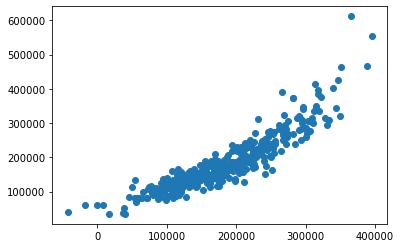

In [27]:
import matplotlib.pyplot as plt
plt.scatter(pred,y_test)

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(x_train,y_train)

C:\Users\windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
logmodel.score(x_test,y_test)*100

1.141552511415525

In [32]:
pred1 = logmodel.predict(x_test)

In [33]:
pred1

array([190000, 192000, 141000, 140000, 215000, 185000, 145000, 110000,
       192000, 115000, 172500, 180000, 143000, 189000, 144000, 215000,
       181000, 143000, 148500, 110000, 275000, 119000, 144000, 185000,
       190000, 165000, 135000, 144000, 127000, 185000, 110000, 125500,
       144000, 189000, 185000, 115000, 135000, 215000, 325000, 144000,
       197000, 125500, 115000, 178000, 145000, 235000, 190000, 118000,
       144000, 125500, 197000, 141000, 230000, 145000, 215000, 197000,
       145000, 165000, 141000, 118000, 147000, 140000, 110000, 135000,
       175000, 165000, 135000, 110000, 124000, 230000, 135000, 144000,
       141000, 141000, 178000, 275000, 185000, 146000, 290000, 178000,
       175000, 290000, 155000, 175000, 110000, 115000, 147000, 168000,
       250000, 110000, 143000, 115000, 125500, 141000, 290000, 144000,
       197000, 197000, 185000, 155000, 197000, 168000, 143000, 143000,
       100000, 181000, 240000, 180000, 115000, 144000, 140000, 185000,
      

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(x)

In [35]:
train

array([[ 0.07337496, -0.20714171,  0.65147924, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276, -0.09188637, -0.07183611, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496,  0.07347998,  0.65147924, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.08016039, -0.79515147, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276, -0.05811155, -0.79515147, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=10)

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb = GaussianNB()

In [41]:
gnb.fit(x_train,y_train)

GaussianNB()

In [43]:
gnb.score(x_test,y_test)*100

0.684931506849315